In [4]:
from dbfread import DBF
import pandas as pd
from pandas import DataFrame
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.charts import HeatMap, output_file, show
from bokeh.charts import HeatMap, bins, output_file, show
from bokeh.layouts import column, gridplot

# Notebook 4
**In this notebook, we are going to explore some of the non human-factors that lead to accidents and fatal death.**

Load 10 years of accident data from the saved data on Notebook2

In [5]:
fatal_crashs = pd.read_hdf('results/fatal_crashs.h5', 'fatal_crashs')

In [24]:
fatal_crashs.head()

,STATE,YEAR,CASE_NUM,HIT_RUN,SPEED,ROLLOVER,FIRE,SPEEDING,DEATHS,NUM_VEHICLE,...,COLLISION_TYPE,LIGHT_CONDITION,WEATHER,ARR_HOUR,ARR_MIN,CRASH_FACTOR,DRUNK_DRIVE,AGE,SEX,RACE
0,10,2007,100001,0.0,99.0,0.0,0.0,NaN,1.0,1.0,...,Not Collision,Dark,1.0,21.0,2.0,0.0,0.0,16.0,1.0,1.0
1,10,2007,100002,0.0,50.0,0.0,0.0,NaN,0.0,2.0,...,Not Collision,Dark,1.0,18.0,29.0,0.0,0.0,27.0,2.0,78.0
2,10,2007,100002,0.0,50.0,0.0,0.0,NaN,0.0,2.0,...,Not Collision,Dark,1.0,18.0,29.0,0.0,0.0,42.0,1.0,0.0
3,10,2007,100002,0.0,50.0,0.0,0.0,NaN,0.0,2.0,...,Not Collision,Dark,1.0,18.0,29.0,0.0,0.0,62.0,1.0,0.0
4,10,2007,100002,0.0,50.0,0.0,0.0,NaN,0.0,2.0,...,Not Collision,Dark,1.0,18.0,29.0,0.0,0.0,27.0,2.0,78.0


# Weather

** one of the most important contributing factor to accidetn is weather.**
**we want to explore the proportion of eahc weather condition that leads to accident.**


In [74]:
accident_weather = fatal_crashs.groupby("WEATHER")["WEATHER"].count().reset_index(name="count").sort_values("count", ascending = False )
accident_weather = accident_weather.reset_index(drop=True)

In [76]:
accident_weather.head()

,WEATHER,count
0,1.0,1109358
1,10.0,145449
2,2.0,102098
3,4.0,62893
4,5.0,33098


In [77]:
accident_weather["Code Meaning"] = accident_weather['WEATHER'].map({0.0:'Normal',1.0:'Clear',2.0:'Rain', 3.0: 'Sleet,Hail', 4.0:'Snow', 5.0:'Fog, Smog, Smoke',6.0:'Severe Crosswinds',7.0:'Blowing Sand, Soil, Dirt',8.0:'other',9.0: 'Unknown',10.0:'Cloudy',11.0:'Blowing Snow',12.0:'Freezing Rain or Drizzle',98.0:'Not Reported', 99.0:'Unknown' })

In [79]:
accident_weather.head()

,WEATHER,count,Code Meaning
0,1.0,1109358,Clear
1,10.0,145449,Cloudy
2,2.0,102098,Rain
3,4.0,62893,Snow
4,5.0,33098,"Fog, Smog, Smoke"


let's generate a boxplot to visulizaize how many accident happens under each weather condition

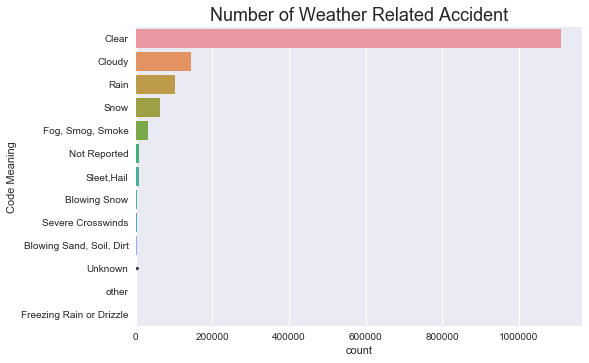

In [81]:
sns.barplot(y = 'Code Meaning', x = 'count', data = accident_weather)
plt.title("Number of Weather Related Accident", fontsize=18)
plt.xlabel("count")
plt.show()

In [84]:
#  a function hide any percentage that is less than 1 percent
def my_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 1 else ''

# hide any label with percentage that is less than 1 percent
label = []
summ = sum(accident_weather['count'])
length = len(accident_weather['count'])

for i in range(length):
    if accident_weather['count'][i]/summ >= 0.01:
        label.append(accident_weather['Code Meaning'][i])
    else:
        label.append('')

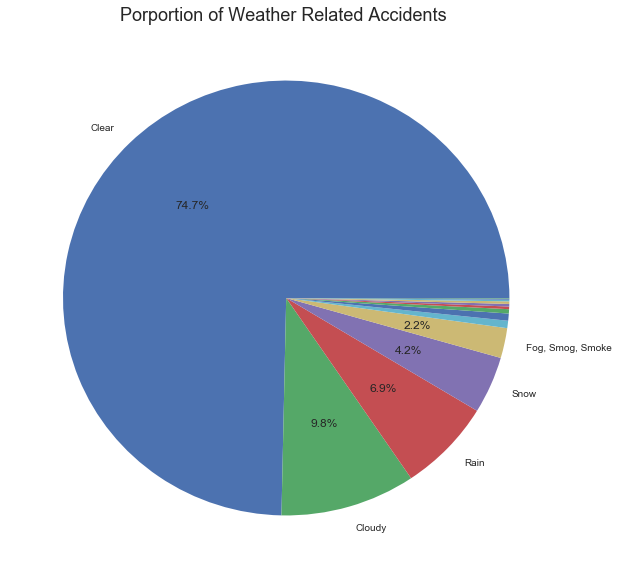

In [85]:

#this is much a better plot than the previous one

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
ax.pie(accident_weather['count'],labels = label,autopct= my_autopct)
plt.title("Porportion of Weather Related Accidents ", fontsize=18)
plt.show()

# Light Condtion

In [86]:
light_accident = fatal_crashs.groupby("LIGHT_CONDITION")["LIGHT_CONDITION"].count().reset_index(name="count").sort_values("count", ascending = False )
light_accident = light_accident.reset_index(drop=True)

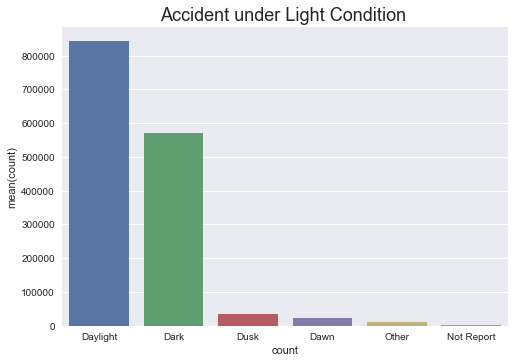

In [88]:
sns.barplot(x = 'LIGHT_CONDITION', y = 'count', data = light_accident)
plt.title("Accident under Light Condition ", fontsize=18)
plt.xlabel("count")
plt.show()

# Intersection 

**we will explore  how different intersections leads to traffic accidents. **

**Since this data has only been recorded since 2009, we need to create a new data frame from 2010 to 2016.**

In [93]:
dbf10= DBF('accident/accident2010.dbf')
dbf11 = DBF('accident/accident2011.dbf')
dbf12 = DBF('accident/accident2012.dbf')
dbf13 = DBF('accident/accident2013.dbf')
dbf14 = DBF('accident/accident2014.dbf')
dbf15 = DBF('accident/accident2015.dbf')
dbf16 = DBF('accident/accident2016.dbf')
accidents10 = DataFrame(iter(dbf10))
accidents11 = DataFrame(iter(dbf11))
accidents12 = DataFrame(iter(dbf12))
accidents13 = DataFrame(iter(dbf13))
accidents14 = DataFrame(iter(dbf14))
accidents15 = DataFrame(iter(dbf15))
accidents16 = DataFrame(iter(dbf16))

In [94]:
accidents_intersect = pd.concat([accidents10,accidents11,accidents12,accidents13,accidents14,accidents15,accidents16], axis=0,join='inner')

In [95]:
accidents_intersect['TYP_INT'] = accidents_intersect['TYP_INT'].map({1:'Not an Intersection',2:'Four-Way Intersection',3:'T-Intersection',4:'Y-Intersection',5:'Traffic Circle',6:'Roundabout',7:"Five-Point, or More",10:"L-Intersection",98:"Not Reported",99:"Unknown"})

In [97]:
accidents_intersect.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PEDS,PERSONS,COUNTY,CITY,DAY,MONTH,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,2,81,2340,15,1,...,99,4,20,99,99,0,0,0,1,1
1,1,10002,1,1,0,1,35,1080,11,1,...,99,6,9,99,99,0,0,0,1,0
2,1,10003,3,3,0,3,97,2100,14,1,...,99,15,16,99,99,0,0,0,1,0
3,1,10004,2,2,0,2,115,160,21,1,...,99,1,16,88,88,0,0,0,1,0
4,1,10005,2,2,0,2,117,0,4,1,...,99,6,49,88,88,0,0,0,1,0


In [98]:
accidents_intersect_count = accidents_intersect.groupby("TYP_INT")["TYP_INT"].count().reset_index(name="count").sort_values("count", ascending = False )
accidents_intersect_count = accidents_intersect_count.reset_index(drop=True)
accidents_intersect_count.head()

,TYP_INT,count
0,Not an Intersection,166976
1,Four-Way Intersection,31421
2,T-Intersection,17530
3,Y-Intersection,1436
4,"Five-Point, or More",247


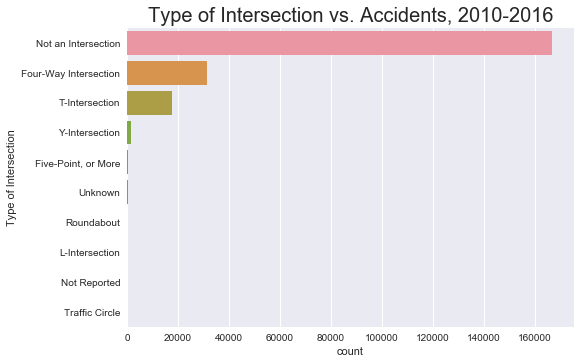

In [99]:
sns.barplot(data = accidents_intersect_count, y = 'TYP_INT', x = 'count')
plt.xlabel("count")
plt.ylabel("Type of Intersection")
plt.title('Type of Intersection vs. Accidents, 2010-2016', fontsize = 20)
plt.show()

In [2]:
dbf07= DBF('accident/accident2007.dbf')
dbf08= DBF('accident/accident2008.dbf')
dbf09= DBF('accident/accident2009.dbf')
dbf10= DBF('accident/accident2010.dbf')
dbf11 = DBF('accident/accident2011.dbf')
dbf12 = DBF('accident/accident2012.dbf')
dbf13 = DBF('accident/accident2013.dbf')
dbf14 = DBF('accident/accident2014.dbf')
dbf15 = DBF('accident/accident2015.dbf')
dbf16 = DBF('accident/accident2016.dbf')
accidents07 = DataFrame(iter(dbf07))
accidents08 = DataFrame(iter(dbf08))
accidents09 = DataFrame(iter(dbf09))
accidents10 = DataFrame(iter(dbf10))
accidents11 = DataFrame(iter(dbf11))
accidents12 = DataFrame(iter(dbf12))
accidents13 = DataFrame(iter(dbf13))
accidents14 = DataFrame(iter(dbf14))
accidents15 = DataFrame(iter(dbf15))
accidents16 = DataFrame(iter(dbf16))


First, we want to combine accidents10 ~ accidents16 to one dataframe. Since not all of the accident data downloaded from the U.S. Department of Transportation have the same features, by using the `jion:inner` option in `pd.concat` function, we can get the intersection of features.

In [3]:
# rename column name in frame07 so that columns names are the same with other frames
accidents07.rename(columns={'latitude': 'LATITUDE', 'longitud': 'LONGITUD'}, inplace=True)

In [4]:
# take a look inside how the accident data file looks like
allaccidents = pd.concat([accidents07,accidents08,accidents09,accidents10,accidents11,accidents12,accidents13,accidents14,accidents15,accidents16], axis=0,join='inner')
pd.set_option('display.max_columns', 100)

In [42]:
allaccidents.shape

(320874, 42)

NameError: name 'accidents17' is not defined

## Select variables and rename variables

Observed from the table above, some of the variables in the table are not very readable. Therefore, in order to make it easier to understand the variables,we renamed some of the variables according to `FARS Analytical User’s Manual`  downloaded from the  `U.S. Department of Transportation`  website.

In [70]:
#combine all vehicle file
import warnings
warnings.filterwarnings('ignore')

#select only necessary variable
accidents = allaccidents[['YEAR','ST_CASE','STATE','VE_TOTAL','PERSONS','FATALS','MONTH','DAY_WEEK','HOUR','NHS','LATITUDE','LONGITUD','MAN_COLL','LGT_COND','WEATHER','ARR_HOUR','ARR_MIN','CF1','DRUNK_DR',]]

#rename the variable according to FARS Analytical User’s Manual for easy understanding
accidents.rename(columns={'ST_CASE':'CASE_NUM','VE_TOTAL':'NUM_VEHICLE','NHS': 'HIGHWAY', 'MAN_COLL': 'COLLISION_TYPE','LGT_COND':'LIGHT_CONDITION','CF1':'CRASH_FACTOR','DRUNK_DR':'DRUNK_DRIVE'}, inplace=True)

#match month, weekday, weekends, highway or not, collision and light condition to its meaning
accidents['MONTH'] = accidents['MONTH'].map({1.0:'January', 2.0:'February', 3.0: 'March', 4.0:'April', 5.0:'May', 6.0:'June', 7.0:'July', 8.0:'August',9.0: 'September', 10.0:'October', 11.0:'November', 12.0:'December'})
accidents['DAY_WEEK']= accidents['DAY_WEEK'].map({1.0:'Sunday',2.0:'Monday', 3.0:'Tuesday', 4.0: 'Wednesday', 5.0:'Thursday', 6.0:'Friday', 7.0:'Saturday'})
accidents['HIGHWAY'] = accidents['HIGHWAY'].map({1.0:'On',0.0:'Off',9.0:'Unknow'})
accidents['COLLISION_TYPE'] = accidents['COLLISION_TYPE'].map({0.0:'Not Collision',1.0:'Rear-End',2.0:'Head-On',3.0:'Rear-to-Rear',4.0:'Angle',5.0:'Sideswipe, Same Direction',6.0:'Sideswipe, Opposite Direction',7.0:'Sideswipe, Unknown Direction',9.0:'Unknown'})
accidents['LIGHT_CONDITION'] = accidents['LIGHT_CONDITION'].map({1.0:'Daylight',2.0:'Dark' ,3.0:'Dark',5.0:'Dusk',6.0:'Dark',4.0:'Dawn', 7.0:'Other',8.0 :'Not Report', 9.0:'Not Report'})


In [7]:
#match Weather code to its meaning
accidents['WEATHER'] = accidents['WEATHER'].map({0.0:'Normal',1.0:'Clear',2.0:'Rain', 3.0: 'Sleet,Hail', 4.0:'Snow', 5.0:'Fog, Smog, Smoke',6.0:'Severe Crosswinds',7.0:'Blowing Sand, Soil, Dirt',8.0:'other',10.0:'Cloudy',11.0:'Blowing Snow',12.0:'Freezing Rain or Drizzle',98.0:'Not Reported', 99.0:'Unkown' })

In [8]:
accidents['STATE']=accidents['STATE'].astype(int)
accidents['CASE_NUM']=accidents['CASE_NUM'].astype(int)
accidents['YEAR']=accidents['YEAR'].astype(object)

In [9]:
accidents.index = list(accidents['YEAR'].astype(str) + accidents['CASE_NUM'].astype(str))
accidents.shape

(320874, 19)

In [10]:
accidents.head()

,YEAR,CASE_NUM,STATE,NUM_VEHICLE,PERSONS,FATALS,MONTH,DAY_WEEK,HOUR,HIGHWAY,LATITUDE,LONGITUD,COLLISION_TYPE,LIGHT_CONDITION,WEATHER,ARR_HOUR,ARR_MIN,CRASH_FACTOR,DRUNK_DRIVE
2007.010001,2007,10001,1,1.0,1.0,1.0,January,Tuesday,23.0,Off,33.455839,-87.017928,Not Collision,Dark,Clear,23.0,20.0,0.0,0.0
2007.010002,2007,10002,1,3.0,4.0,2.0,January,Tuesday,13.0,Off,34.160597,-85.678075,"Sideswipe, Same Direction",Daylight,Clear,13.0,11.0,0.0,0.0
2007.010003,2007,10003,1,2.0,5.0,1.0,January,Sunday,12.0,Off,33.975717,-86.496347,"Sideswipe, Unknown Direction",Daylight,Clear,12.0,18.0,0.0,0.0
2007.010004,2007,10004,1,2.0,2.0,1.0,January,Monday,15.0,On,33.853258,-85.915622,Angle,Daylight,Clear,15.0,5.0,0.0,0.0
2007.010005,2007,10005,1,2.0,5.0,1.0,January,Saturday,19.0,Off,32.488833,-86.408936,"Sideswipe, Same Direction",Dark,Clear,19.0,41.0,0.0,0.0


In [ ]:
feature = ['TYP_INT']
accidents_

We have generate some visualizations to give you a general idea

**First we explore the relationship between month and number of accidents. We can see if there is a general pattern or discrepencies in the trend**

In [11]:
accident_month = accidents.groupby("MONTH")["MONTH"].count().reset_index(name="count")

In [12]:
accident_month.head()


,MONTH,count
0,April,25427
1,August,29686
2,December,26411
3,February,21457
4,January,23269


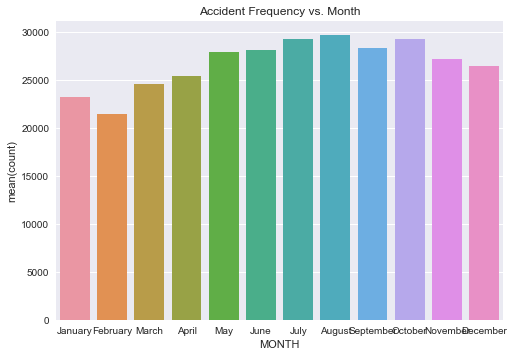

In [13]:
import seaborn as sns
index = ['January','February','March', 'April', 'May','June','July','August','September', 'October', 'November', 'December']
sns.barplot(x = "MONTH" , y = "count", data = accident_month, order = index)
plt.title("Accident Frequency vs. Month")
plt.show()

** it can be say that there are relatively less accidents at the start and end of a year than in the middle of the year ***

**Then, we explore the relationship between Year and num of accidents**

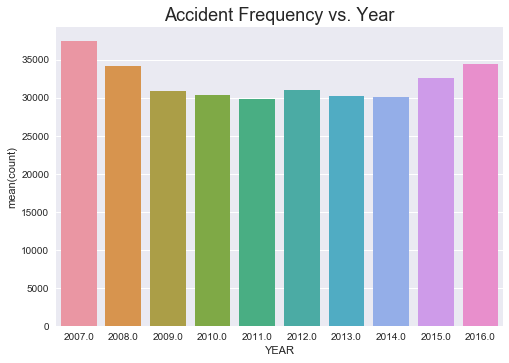

In [14]:
accident_year = accidents.groupby("YEAR")["YEAR"].count().reset_index(name="count")
sns.barplot(x = "YEAR" , y = "count", data = accident_year)
plt.title("Accident Frequency vs. Year", fontsize=18)
plt.show()

We also want to study the mortality rate of fatal accidents. The data element “Fatalities in Vehicle” in the Vehicle data file from the `U.S. Department of Transportation` website provides the number of deaths in a vehicle.

In [22]:
vdbf07= DBF('vehicle_deaths/vehicle2007.dbf')
vdbf08= DBF('vehicle_deaths/vehicle2008.dbf')
vdbf09= DBF('vehicle_deaths/vehicle2009.dbf')
vdbf10= DBF('vehicle_deaths/vehicle2010.dbf')
vdbf11= DBF('vehicle_deaths/vehicle2011.dbf')
vdbf12= DBF('vehicle_deaths/vehicle2012.dbf')
vdbf13= DBF('vehicle_deaths/vehicle2013.dbf')
vdbf14= DBF('vehicle_deaths/vehicle2014.dbf')
# vdbf15= DBF('vehicle_deaths/vehicle2015.csv')
vdbf16= DBF('vehicle_deaths/vehicle2016.dbf')
vehicle07 = DataFrame(iter(vdbf07))
vehicle08 = DataFrame(iter(vdbf08))
vehicle09 = DataFrame(iter(vdbf09))
vehicle10 = DataFrame(iter(vdbf10))
vehicle11 = DataFrame(iter(vdbf11))
vehicle12 = DataFrame(iter(vdbf12))
vehicle13 = DataFrame(iter(vdbf13))
vehicle14 = DataFrame(iter(vdbf14))
# vehicle15 = pd.read_csv('vehicle_deaths/vehicle2015.csv')
vehicle16 = DataFrame(iter(vdbf16))

# Load vehicle data file which contains mortality rate

In [23]:
vehicle07['YEAR']=2007
vehicle08['YEAR']=2008
vehicle09['YEAR']=2009
vehicle10['YEAR']=2010
vehicle11['YEAR']=2011
vehicle12['YEAR']=2012
vehicle13['YEAR']=2013
vehicle14['YEAR']=2014
# vehicle15['YEAR']='2015.0'
vehicle16['YEAR']=2016

In [24]:
allvehicles=pd.concat([vehicle07,vehicle08,vehicle09,vehicle10,vehicle11,vehicle12,vehicle13,vehicle14,vehicle16], axis=0,join='outer')
vehicles = allvehicles[['STATE','YEAR','ST_CASE','HIT_RUN','TRAV_SP','ROLLOVER','FIRE_EXP','SPEEDREL','DEATHS']]
vehicles.rename(columns={'ST_CASE':'CASE_NUM','TRAV_SP':'SPEED','FIRE_EXP': 'FIRE','SPEEDREL':'SPEEDING'}, inplace=True)
vehicles['STATE']=vehicles['STATE'].astype(int)
vehicles['CASE_NUM']=vehicles['CASE_NUM'].astype(int)
vehicles['YEAR']=vehicles['YEAR'].astype(int)
vehicles.index = list(vehicles['YEAR'].astype(str) + vehicles['CASE_NUM'].astype(str))
vehicles.head()

,STATE,YEAR,CASE_NUM,HIT_RUN,SPEED,ROLLOVER,FIRE,SPEEDING,DEATHS
200710001,1,2007,10001,0.0,65.0,0.0,0.0,NaN,1.0
200710002,1,2007,10002,0.0,10.0,0.0,0.0,NaN,0.0
200710002,1,2007,10002,0.0,55.0,0.0,0.0,NaN,2.0
200710002,1,2007,10002,0.0,55.0,0.0,0.0,NaN,0.0
200710003,1,2007,10003,1.0,55.0,0.0,0.0,NaN,0.0


In [25]:
all = pd.merge(vehicles, accidents, left_index=True, right_index=True, how='inner',on=('STATE', 'YEAR','CASE_NUM'))
all.index=(all.index).astype(int)
all.sort_index()
all.head()

,STATE,YEAR,CASE_NUM,HIT_RUN,SPEED,ROLLOVER,FIRE,SPEEDING,DEATHS,NUM_VEHICLE,PERSONS,FATALS,MONTH,DAY_WEEK,HOUR,HIGHWAY,LATITUDE,LONGITUD,COLLISION_TYPE,LIGHT_CONDITION,WEATHER,ARR_HOUR,ARR_MIN,CRASH_FACTOR,DRUNK_DRIVE


In [ ]:
year_acci.index

In [ ]:
with sns.plotting_context("poster"):
    g = sns.FacetGrid(data=accidents, col="continent", col_wrap=4)
    g.map(sns.boxplot, 'variable',"value")
    g.set_axis_labels("drinks", "consumption value")